# TMA 01, question 3 (45 marks)

**Name**: Daniel Smith
    
**PI**: A7603242

### The task

In question 1, you started looking at a dataset covering the wholesale values for fruit and vegetables for the years 2004-2012. The dataset was available at:

https://data.gov.uk/dataset/agricultural_market_reports
    
The entire dataset is available for download, but we have also provided a download of the data in the file <code>fruitveg.csv</code> in the <code>data</code> directory.

Visit the website via the above link, read the description of the data and then answer the following questions.

You are now required to combine some of the information from this dataset with data about the amount of orchard space in England and Wales, which you can download from this site:

    https://data.gov.uk/dataset/orchard_fruit_survey

but which is also contained in the file <code>orchfruit_ap&pr_30may13.csv</code> in the <code>data</code> directory.

**You must produce a graphical representation of the changes in average wholesale price and orchard space for each type of dessert apple grown in England and Wales. You should then discuss what your representation shows.**

*(45 marks)*

### Some guidance

This TMA question gives you the opportunity to demonstrate your mastery of the techniques in carrying out a small-scale data analysis. Specifically, this question requires you to clean two datasets, combine and reshape them, and graphically present the cleaned data. All the techniques required to answer this question can be found in Parts 2-5, and are illustrated in the associated notebooks.

There are many ways you could approach this task, but one way might be to produce a pandas dataframe, containing the values so that for each variety of apple, and for each year, the average wholesale price for the year is listed, and the total orchard space given over to that variety. The final dataframe could look something like this:



|Apple variety|Year|Average wholesale price|Orchard space|
|---|---|---|---|
|Cox|2004 | 45 | 12 |
|Cox|2012 | 45 | 12 |
|Worcester|2004 | 23 | 1 |
|Worcester|2012 | 23 | 1 |
|$\vdots$ | $\vdots$ | $\vdots$ | $\vdots$ |


(although note that the figures 45, 12, 23 and 1 are just for illustration; they are not necessarily the correct values for the question).


You should then construct one or more plots showing how the relationships between the type of apple, the average wholesale price of that type, and the England and Wales orchard space for each type has changed over the period 2004-2015. You should also give an explanation of what you believe the plot shows.

This question requires that you complete a number of tasks:

1. You need to examine the datasets. You should consider questions such as how missing data is handled, whether there is any dirtiness or ambiguity in the data, and any differences in how data is represented in the two datasets. This task uses the techniques described in Part 3, section 2.

2. You will need to capture the data in a dataframe in the form described above. This task uses the techniques described in Part 3, section 3 and Part 4.

3. Finally, you should select a visualisation method for the data in the dataset, and present a plot of the data, with a description of how you think it should be interpreted. This task uses the techniques described in Part 5. We are not prescribing a particular choice of visualisation: you should choose one that you think is appropriate.


It is crucial for this question to bear in mind that at each stage, you must describe what you have done in sufficient detail that someone could replicate your work. This means that you must:

* explain what any code that you have written does, and execute it in the body of your submitted notebook,

* where you have used tools that are not accessed via python or the notebooks (such as OpenRefine), you should include some screenshots to show what you did, and to help the marker understand your thinking,

* clearly explain any assumptions or simplifications that you have made about the data, and

* interpret your final results in the context of these assumptions and simplifications.


Some guidance on presentation:

* You must present your answer in this notebook.
    
* Do not put too much text or code into each notebook cell. Each cell should contain one or two paragraphs at most, or around ten lines of python.

* Ensure that in your code, you use meaningful variable names.

* You should have a specific cell whose return value is the dataframe described above.

* You should have a specific cell which plots the data in the dataframe.

We have provided a structure for your answer, and you should describe your work under the appropriate headings in the rest of the TMA. The headings do not represent equal amounts of work, nor do they necessarily carry the same weight as the equivalent headings in question 2, because different datasets and different tasks require the effort to be spent in different places. You may need to use several cells to address a particular heading. For example, you would expect to present substantially more work on identifying and handling the missing data, than on importing the datasets. 

### Your answer

#### 1. Import the two datasets

In [1]:
# import libraries that will be used
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

##### The FruitVeg data
When I first tried to open this dataset it was giving errors, after some experimenting I realised that although it was a CSV file it was a tab separated format. 

In [2]:
# load the fruitveg dataset
# this csv file uses a tab seperator '\t'
fruitveg_df = pd.read_csv('data/fruitveg.csv', sep='\t')
fruitveg_df.head()

,2004,Unnamed: 1,Quality,Units,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,FRUIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Blackberries,All Varieties,-,£/kg,NaN,NaN,NaN,NaN,NaN,NaN,3.26,3.24,3.61,5.06,NaN,NaN
2,Blackcurrants,All Varieties,-,£/kg,NaN,NaN,NaN,NaN,NaN,NaN,3.32,3.53,NaN,NaN,NaN,NaN
3,Cherries,Sweet Black,1st,£/kg,NaN,NaN,NaN,NaN,NaN,1.69,1.72,3.68,NaN,NaN,NaN,NaN
4,NaN,Sweet Black,2nd,£/kg,NaN,NaN,NaN,NaN,NaN,1.11,1.08,NaN,NaN,NaN,NaN,NaN


In [3]:
# check how long the dataset is
len(fruitveg_df)

2040

##### The orchards data
This dataset was more straightforward to import.

In [4]:
# load the orchards dataset
orchards_df = pd.read_csv('data/orchfruit_ap&pr_30may13.csv')

orchards_df.head()

,year,Totalapples,Discovery,WorcesterPearmain,Cox(andclones),EgremontRusset,Braeburn,Gala(andclones),Jonagold(andclones),Cameo,...,Cider apples of which:,Bush cider apples,Traditional cider apples,Total plums,Victoria,Marjorie's Seedling,Other plums,Total other orchard fruit,Cherries,Other top fruit (incl. nuts)
0,1999,1709.0,577.0,294.0,4694.0,325.0,NaN,757.0,400.0,NaN,...,4996.0,NaN,NaN,1367.0,788.0,164.0,415.0,748.0,591.0,157.0
1,2000,16500.0,484.0,283.0,4186.0,334.0,NaN,828.0,353.0,NaN,...,5043.0,4024.0,1019.0,1213.0,659.0,170.0,384.0,590.0,459.0,131.0
2,2001,16983.0,420.0,207.0,3489.0,331.0,NaN,719.0,257.0,NaN,...,7010.0,4657.0,2353.0,1072.0,543.0,152.0,377.0,700.0,473.0,227.0
3,2002,15110.0,339.0,196.0,3015.0,268.0,NaN,663.0,201.0,NaN,...,6738.0,4304.0,2434.0,947.0,493.0,148.0,306.0,579.0,428.0,151.0
4,2003,14346.0,264.0,147.0,2738.0,264.0,306.0,674.0,227.0,NaN,...,6551.0,4909.0,1642.0,1003.0,474.0,152.0,377.0,522.0,381.0,140.0


#### 2. Identify and handle missing data

On first inspection both dataframes show that there is a lot of missing data.  Looking at each file in turn.
##### 2.1 - Fruitveg missing data



In [5]:
fruitveg_df.head()

,2004,Unnamed: 1,Quality,Units,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,FRUIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Blackberries,All Varieties,-,£/kg,NaN,NaN,NaN,NaN,NaN,NaN,3.26,3.24,3.61,5.06,NaN,NaN
2,Blackcurrants,All Varieties,-,£/kg,NaN,NaN,NaN,NaN,NaN,NaN,3.32,3.53,NaN,NaN,NaN,NaN
3,Cherries,Sweet Black,1st,£/kg,NaN,NaN,NaN,NaN,NaN,1.69,1.72,3.68,NaN,NaN,NaN,NaN
4,NaN,Sweet Black,2nd,£/kg,NaN,NaN,NaN,NaN,NaN,1.11,1.08,NaN,NaN,NaN,NaN,NaN


Even by previewing the first few rows we can see that there are a few issues with missing data:

__No Year column__: The first column has mixed values. And each row is not clearly associated with a given year.

__Missing price data__: A lot of the pricing values are missing.  This could cause an issue when we do calculations based on these data.

_Note: At this stage I decided I would switch to OpenRefine to make it easier to look through the whole dataset, make mass edits, and better inform my decision on the price information._

###### Using OpenRefine
Creating a new OpenRefine project named apples_dcs283 with the following import settings:

<img src='images/fv001.png'>

__Adding a year column__

Running a text facet on the first column we can see there are a number of Year rows in the first column that need to be copied into the new `Year` column.
The following steps were taken:

__Step 1__ - Rename the first column to `Fruit` and edit it's first cell value to `2004` (essentially swapping the two)Fruit

_Before_
<img src='images/fv_001a.png'> 

_After_ 
<img src='images/fv_001b.png'>

__Step 2__ - Run a text facet on the `Fruit` column and include all the years, then add a column based on those values (Fruit>Edit column>Add column based on this column)

_After_
<img src='images/fv_001c.png'>
_note:  These rows will be deleted after the next step as they are essentially the same as the column headers_

__Step 3__ - Remove the facet and fill down the year column (Year>Edit cells>Fill down)

_After_
<img src='images/fv_001d.png'>

__Step 4__ - Remove the unneeded rows identified in step 2.  Run a text facet on `Fruit` once more selecting the years.Remove those matching rows (All>Edit rows>Remove all matching rows).

If we exit the facets we can see there is now missing data in the fruit column.  Once more we will use the column filldown method to fill in that missing data.
_Before_
<img src='images/fv_001e.png'>

_after_
<img src='images/fv_001f.png'>



_Missing Price Data_ The pricing data in some rows is complete, others are not.  Without further information about the source of the data it is hard to determine whether they are were omitted because they were not collected or if they weren't for sale during those months.  Therefore, It was decided to leave them as is, and handle them in Pandas if required.

##### 2.2 - Orchards missing data
Looking at the orchards_df we can see there are a number of values missing in some columns.  We need to find out more before we will be ready to make decisions.

In [6]:
# check how long the orchards dataset is
len(orchards_df)

13

Since it is so short let's quickly look at the whole dataset

In [7]:
# since it is so short look at whole dataset
orchards_df

,year,Totalapples,Discovery,WorcesterPearmain,Cox(andclones),EgremontRusset,Braeburn,Gala(andclones),Jonagold(andclones),Cameo,...,Cider apples of which:,Bush cider apples,Traditional cider apples,Total plums,Victoria,Marjorie's Seedling,Other plums,Total other orchard fruit,Cherries,Other top fruit (incl. nuts)
0,1999,1709.0,577.0,294.0,4694.0,325.0,NaN,757.0,400.0,NaN,...,4996.0,NaN,NaN,1367.0,788.0,164.0,415.0,748.0,591.0,157.0
1,2000,16500.0,484.0,283.0,4186.0,334.0,NaN,828.0,353.0,NaN,...,5043.0,4024.0,1019.0,1213.0,659.0,170.0,384.0,590.0,459.0,131.0
2,2001,16983.0,420.0,207.0,3489.0,331.0,NaN,719.0,257.0,NaN,...,7010.0,4657.0,2353.0,1072.0,543.0,152.0,377.0,700.0,473.0,227.0
3,2002,15110.0,339.0,196.0,3015.0,268.0,NaN,663.0,201.0,NaN,...,6738.0,4304.0,2434.0,947.0,493.0,148.0,306.0,579.0,428.0,151.0
4,2003,14346.0,264.0,147.0,2738.0,264.0,306.0,674.0,227.0,NaN,...,6551.0,4909.0,1642.0,1003.0,474.0,152.0,377.0,522.0,381.0,140.0
5,2004,13612.0,301.0,213.0,3144.0,308.0,194.0,669.0,231.0,NaN,...,5190.0,3605.0,1585.0,978.0,532.0,152.0,293.0,623.0,389.0,234.0
6,2007,13364.0,189.0,124.0,2128.0,277.0,271.0,740.0,204.0,NaN,...,6271.0,4590.0,1681.0,835.0,408.0,144.0,283.0,608.0,447.0,161.0
7,2009,13594.0,177.0,133.0,1798.0,293.0,304.0,878.0,316.0,36.0,...,6624.0,NaN,NaN,869.0,420.0,153.0,296.0,649.0,478.0,171.0
8,2012,14468.0,157.0,115.0,1697.0,224.0,509.0,1312.0,283.0,41.0,...,7178.0,NaN,NaN,841.0,378.0,161.0,302.0,791.0,609.0,182.0
9,####Cameo Jazz and Kanzi are new categories i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There looks like there is some meta data at the bottom.  Let's see if it will inform us about the dataset and missing values.

In [8]:
# Place the meta-data into a list in case we need it later on.
orchard_meta = list(orchards_df['year'][9:])
# now we candrop those rows from the dataset
orchards_df.drop(orchards_df.index[9:], inplace=True)
# let's read the data
orchard_meta

[' ####Cameo Jazz and Kanzi are new categories introduced in 2009####',
 "####Spartan have been included with' other dessert apples 'from 2009####",
 "####Fiesta/RedPippin have been included in 'other dessert apples 'from 2003####",
 "####Katy was included in 'other dessert apples 'until 2009####"]

So, some of the missing data was caused by reclassifications of some of the varieties into and out of the Other dessert varieties category.

One way to work around this will be to sum these values into a new _Other Dessert Apples_ column. First we will need to fill those NaN with 0 in order to add them together.

In [9]:
# as we are only interested in the total values for each column let's fillna with 0
orchards_df.fillna(0, inplace=True)

In [10]:
# Let's quickly check the spelling of the column names
orchards_df.columns

Index(['year', 'Totalapples', 'Discovery', 'WorcesterPearmain',
       'Cox(andclones)', 'EgremontRusset', 'Braeburn', 'Gala(andclones)',
       'Jonagold(andclones)', 'Cameo', 'Jazz', 'Kanzi',
       'Other dessert varieties', 'Spartan', 'Fiesta/RedPippin', 'Katy',
       'Bramleys Seedling', 'Other culinary apples', 'Cider apples of which:',
       'Bush cider apples', 'Traditional cider apples', 'Total plums',
       'Victoria', 'Marjorie's Seedling', 'Other plums',
       'Total other orchard fruit', 'Cherries',
       'Other top fruit (incl. nuts)'],
      dtype='object')

Now we are ready to sum those values into the new `Other Dessert Apples` column.

In [11]:
# make a list of the columns we will sum
cols = ['Other dessert varieties','Spartan','Fiesta/RedPippin','Katy']
orchards_df['Other Dessert Apples'] = orchards_df[cols].sum(axis=1)

# check it went as planned
orchards_df[cols + ['Other Dessert Apples']]

,Other dessert varieties,Spartan,Fiesta/RedPippin,Katy,Other Dessert Apples
0,1276.0,299.0,186.0,0.0,1761.0
1,1194.0,286.0,163.0,0.0,1643.0
2,1209.0,257.0,133.0,0.0,1599.0
3,945.0,195.0,109.0,0.0,1249.0
4,729.0,142.0,0.0,0.0,871.0
5,957.0,164.0,0.0,0.0,1121.0
6,877.0,137.0,0.0,0.0,1014.0
7,724.0,0.0,0.0,133.0,857.0
8,847.0,0.0,0.0,129.0,976.0


#### 3. Identify and handle inconsistent or dirty data

Between both datasets there are inconsistencies between how apple varieties are named.  There is also a lot of irrelevant data that we should remove from the datasets before combining them. 

Both data sets also have data about other produce that is clearly unrelated (e.g. cherries).  However a decision was needed on cooking apples.  Technically I do not believe them to be dessert apples, so I will not include them in the final version of the DataFrames.

First we will handle the apples dataset using OpenRefine.

##### OpenRefine apples_dcs283 project

A few steps were required here.  

Firstly Renaming the column 'Column' to 'Variety' (as we had missed that earlier!)

_Start_
<img src='images/fv_002a.png'>

__Step 2__ - Make a text facet on Fruit, and then on Dessert apples.
This gives us a list of the spellings of Variety names.
<img src='images/fv_002b.png'>
In comparing these to the orchard column names we can see that in general the Orchards columns do not have spaces and sometimes have more information (e.g. `Cox(andclones)`).  it was decided to simplify the naming system to just the apple variety name across both datasets.  

Dessert apple variety name changes:
 - `Cox's Orange-group` will be edited to `Cox` (dropping the extra information)
 - `Jonogold - group` will become `Jonagold` (fixing the spelling error)

Finally the Red pippin is also listed as Fiesta/RedPippin in the orchards dataset.  However, A quick look on google showed that this apple variety does go by both names.  I have opted for `Red Pippin` in this case as the audience for this data investigation is likely to be very small and have seen my reasoning.

_after these changes we have the following facets_
<img src='images/fv_002c.png'>

Next we should combine the apple varieties of 'Other ... Season' and those varieties grouped under `Other merged` in the from orchards_df like we did earlier for the orchard data.  We can simply edit each name to `Other Dessert Apples` so that it will work well with the orchards dataset. The varieties to rename are:
 - `Other Early Season`
 - `Other Late Season`
 - `Other Mid Season`
 - `Red Pippin`
 - `Katy`
 - `Spartan`

After these changes we have the following varieties:

<img src='images/fv_002e.png'>


Finally we will export the columns we need as a CSV file and open again in this notebook.

First, we will facet the data we want to keep, by running a text facet on the `Fruit` column and including only `Dessert Apples`.

<img src='images/fv_002f.png'>


Next using the custom tabular exporter we simply select those columns needed for our our analysis. 

<img src='images/fv_002g.png'>

Finally we download the file as a CSV and copy it into the data directory.  Then load it in as apples_df here.

<img src='images/fv_002e.png'>

In [12]:
# load in the cleaned file
apples_df = pd.read_csv('data/apples_dcs283.csv')
# check it looks ok
apples_df.head()

,Year,Variety,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2004,Cox,0.62,0.63,0.6,0.58,NaN,NaN,NaN,NaN,0.68,0.51,0.53,0.58
1,2004,Cox,0.40,0.40,0.4,0.42,NaN,NaN,NaN,NaN,0.39,0.33,0.30,0.33
2,2004,Cox,0.55,0.54,0.5,0.51,NaN,NaN,NaN,NaN,0.64,0.45,0.46,0.50
3,2004,Discovery,NaN,NaN,NaN,NaN,NaN,NaN,0.75,0.51,0.37,NaN,NaN,NaN
4,2004,Discovery,NaN,NaN,NaN,NaN,NaN,NaN,0.66,0.33,0.25,NaN,NaN,NaN


##### Orchards_df
We can apply the same simplified naming system to the DataFrame.

In [13]:
# Check the column spellings                     })
orchards_df.columns

Index(['year', 'Totalapples', 'Discovery', 'WorcesterPearmain',
       'Cox(andclones)', 'EgremontRusset', 'Braeburn', 'Gala(andclones)',
       'Jonagold(andclones)', 'Cameo', 'Jazz', 'Kanzi',
       'Other dessert varieties', 'Spartan', 'Fiesta/RedPippin', 'Katy',
       'Bramleys Seedling', 'Other culinary apples', 'Cider apples of which:',
       'Bush cider apples', 'Traditional cider apples', 'Total plums',
       'Victoria', 'Marjorie's Seedling', 'Other plums',
       'Total other orchard fruit', 'Cherries', 'Other top fruit (incl. nuts)',
       'Other Dessert Apples'],
      dtype='object')

In [14]:
# rename the columns 
# noticed 'year' was different here so renaming that column as well
orchards_df.rename(columns={'year': 'Year',
                            'WorcesterPearmain':'Worcester Pearmain',
                            'Cox(andclones)':'Cox',
                            'EgremontRusset':'Egremont Russet',
                            'Gala(andclones)':'Gala',
                            'Jonagold(andclones)':'Jonagold'},inplace=True)
# check it was as expected
orchards_df.columns       

Index(['Year', 'Totalapples', 'Discovery', 'Worcester Pearmain', 'Cox',
       'Egremont Russet', 'Braeburn', 'Gala', 'Jonagold', 'Cameo', 'Jazz',
       'Kanzi', 'Other dessert varieties', 'Spartan', 'Fiesta/RedPippin',
       'Katy', 'Bramleys Seedling', 'Other culinary apples',
       'Cider apples of which:', 'Bush cider apples',
       'Traditional cider apples', 'Total plums', 'Victoria',
       'Marjorie's Seedling', 'Other plums', 'Total other orchard fruit',
       'Cherries', 'Other top fruit (incl. nuts)', 'Other Dessert Apples'],
      dtype='object')

Finally redfine the DataFrame to include only those columns we will need.

In [15]:
# Redefine the DataFrame
orchards_df = orchards_df[['Year','Discovery','Worcester Pearmain','Cox','Egremont Russet','Braeburn','Gala','Jonagold','Cameo','Jazz','Kanzi','Other Dessert Apples']]
orchards_df

,Year,Discovery,Worcester Pearmain,Cox,Egremont Russet,Braeburn,Gala,Jonagold,Cameo,Jazz,Kanzi,Other Dessert Apples
0,1999,577.0,294.0,4694.0,325.0,0.0,757.0,400.0,0.0,0.0,0.0,1761.0
1,2000,484.0,283.0,4186.0,334.0,0.0,828.0,353.0,0.0,0.0,0.0,1643.0
2,2001,420.0,207.0,3489.0,331.0,0.0,719.0,257.0,0.0,0.0,0.0,1599.0
3,2002,339.0,196.0,3015.0,268.0,0.0,663.0,201.0,0.0,0.0,0.0,1249.0
4,2003,264.0,147.0,2738.0,264.0,306.0,674.0,227.0,0.0,0.0,0.0,871.0
5,2004,301.0,213.0,3144.0,308.0,194.0,669.0,231.0,0.0,0.0,0.0,1121.0
6,2007,189.0,124.0,2128.0,277.0,271.0,740.0,204.0,0.0,0.0,0.0,1014.0
7,2009,177.0,133.0,1798.0,293.0,304.0,878.0,316.0,36.0,83.0,144.0,857.0
8,2012,157.0,115.0,1697.0,224.0,509.0,1312.0,283.0,41.0,117.0,96.0,976.0


#### 4. Identify and handle ambiguity and vagueness

Both datasets are coming together but there are few areas of ambiguity and vagueness that need to be considered and decided upon.

There is ambiguity in how we should calculate the average sale price for an apple variety.  In the fruitveg dataset each variety has various quality levels, without more guidance it is hard to know how to weigh these values correctly (the producers may sell less volume of one quality versus another).  Also, we do not know why there are missing values in certain month columns.

For the orchards dataset, there is an extremely vague definition of what the values represent in the real world.  The website says that it _'collects data on the tree areas rather than the field size'_.  However, without being in the industry it is hard to know exactly what that means!  Assuming they are like for like, some comparisons should be able to be made.

The other area of ambiguity was which apple varieties were categorised as other and when they were grouped into that category.  I decided to bring all those that were known to be in that category at one point back into it in both datasets, so that we can compare them better.

##### Calculating an average sale price for the apples.

The method I decided to use for calculating the average price was to get the mean of all the month values.  Pandas will automatically ignore the NaN values when calulating the mean so we can do:

In [16]:
# first make a list of the month columns for ease of manipulation
month_list = ['Jan','Feb','Mar','Apr','May','Jun',
              'Jul','Aug','Sep','Oct','Nov','Dec']
# create the new column
apples_df['Average'] = apples_df[month_list].mean(axis=1)

# drop the now uneeded month columns
apples_df.drop(month_list, axis=1, inplace=True)

# check it looks ok
apples_df.head()

,Year,Variety,Average
0,2004,Cox,0.591250
1,2004,Cox,0.371250
2,2004,Cox,0.518750
3,2004,Discovery,0.543333
4,2004,Discovery,0.413333


At the moment the various `Quality` values are still showing.  Let's group those together now, again getting the mean value of these for each Apple variety and year.

In [17]:
# group the data by Year and Variety, averaging the average
apples_df = apples_df.groupby(['Variety','Year'],as_index=False)['Average'].mean()

# confirm it is looking right
apples_df.head()

,Variety,Year,Average
0,Braeburn,2014,0.613333
1,Braeburn,2015,0.561333
2,Cox,2004,0.493750
3,Cox,2005,0.456852
4,Cox,2006,0.515787


#### 5. Put the data into an appropriate form for plotting

To prepare for plotting we first need to reshape the orchards dataframe.  Using the melt method we can transform the orchards_df shape to be more similar to the apples_df

In [18]:
orchards_df.head()

,Year,Discovery,Worcester Pearmain,Cox,Egremont Russet,Braeburn,Gala,Jonagold,Cameo,Jazz,Kanzi,Other Dessert Apples
0,1999,577.0,294.0,4694.0,325.0,0.0,757.0,400.0,0.0,0.0,0.0,1761.0
1,2000,484.0,283.0,4186.0,334.0,0.0,828.0,353.0,0.0,0.0,0.0,1643.0
2,2001,420.0,207.0,3489.0,331.0,0.0,719.0,257.0,0.0,0.0,0.0,1599.0
3,2002,339.0,196.0,3015.0,268.0,0.0,663.0,201.0,0.0,0.0,0.0,1249.0
4,2003,264.0,147.0,2738.0,264.0,306.0,674.0,227.0,0.0,0.0,0.0,871.0


In [19]:
# melt the orchards_df into 
orchards_df = pd.melt(orchards_df, id_vars='Year',var_name='Apple variety', value_name='Orchard space')
orchards_df.head()

,Year,Apple variety,Orchard space
0,1999,Discovery,577.0
1,2000,Discovery,484.0
2,2001,Discovery,420.0
3,2002,Discovery,339.0
4,2003,Discovery,264.0


Next, we'll rename the apples_df columns to something more suitable for our target merged shape.

In [20]:
# rename the apple columns to match the desired final table
apples_df.columns = ['Apple variety','Year','Average wholesale price']

__Joining the two datasets__

_Note: I struggled to get the two datasets to merge until I realised that I hadn't checked the data types._

In [21]:
# check the data types of the two datasets
print(apples_df.dtypes)
print(orchards_df.dtypes)

Apple variety               object
Year                         int64
Average wholesale price    float64
dtype: object
Year              object
Apple variety     object
Orchard space    float64
dtype: object


In [22]:
# convert into a string object.
apples_df['Year'] = apples_df['Year'].astype(str)

In [23]:
# Merge the two datasets on Apple Variety and Year keeping only those that match both keys
merged_df = pd.merge(apples_df, orchards_df, on=['Apple variety','Year'], how='inner')
merged_df.head()

,Apple variety,Year,Average wholesale price,Orchard space
0,Cox,2004,0.493750,3144.0
1,Cox,2007,0.599259,2128.0
2,Cox,2009,0.626917,1798.0
3,Cox,2012,0.728009,1697.0
4,Discovery,2004,0.490000,301.0


_Note: I opted for the inner join so as to make sure that we are only going to be comparing values for which we have data from both sources._

#### 6. Visualise the data

Plot 1 comparing the average orchard space against the average apple price

In [24]:
# set up the two sets of data to plot
# average orchard space by year (All Varieties combined)
orch_plot = merged_df[['Year','Orchard space']].groupby('Year').mean()

# average wholesale price by year (All Varieties combined)
price_plot = merged_df[['Year','Average wholesale price']].groupby('Year').mean()

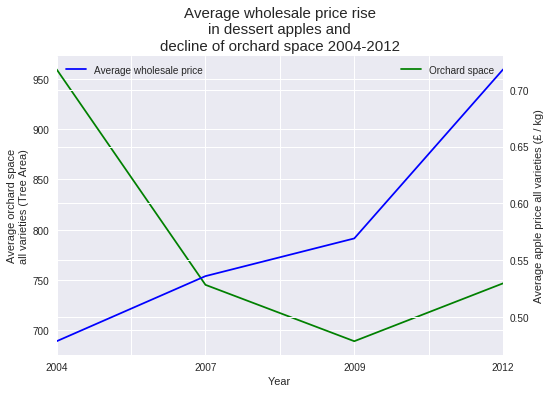

In [25]:
# Create the plot figure
# set up our figure object
fig = plt.figure()

# set the axes for the first plot
orch_axes = fig.add_subplot(111)
# apply the axes to orch_plot
orch_plot.plot.line(ax=orch_axes, color='green')
orch_axes.set_ylabel('Average orchard space\nall varieties (Tree Area)')

# set the axes for the price_plot (share the same x axis)
price_axes = orch_axes.twinx()

# plot on to the price_axes
price_plot.plot.line(ax=price_axes, color='blue')
# set the y-axis label for price plot
price_axes.set_ylabel('Average apple price all varieties (£ / kg)')

plt.title('Average wholesale price rise\nin dessert apples and\ndecline of orchard space 2004-2012', fontsize=15)

_Observations_  This is quite interesting, this plot seems to suggest that there could be a connection between the two variables.

Let's take a quick look at the increase in apple wholesale prices.

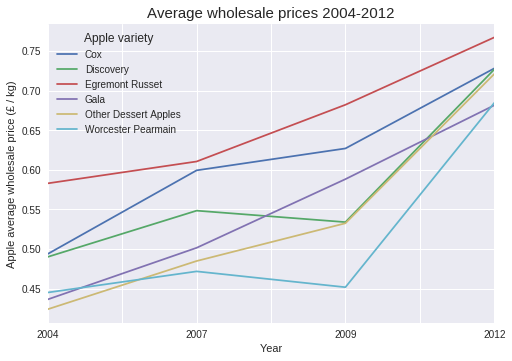

In [26]:
apple_prices_plot = merged_df.pivot('Year','Apple variety','Average wholesale price')
apple_prices_plot.plot()

plt.title('Average wholesale prices 2004-2012',fontsize=15)
plt.xlabel('Year')
plt.ylabel('Apple average wholesale price (£ / kg)')

There looks to be a group of 3 varieties that perform far better after 2009.  Lets highlight those three.

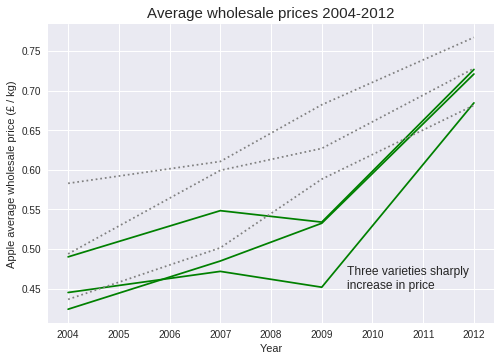

In [27]:
# highlight what looks to be the outlier
plt.plot(apple_prices_plot[['Worcester Pearmain', 'Discovery','Other Dessert Apples']], 'green')

plt.annotate('Three varieties sharply\nincrease in price', xy=(2009.5,0.45))
# draw attention away from the other lines
plt.plot(apple_prices_plot['Cox'], '0.5',
         apple_prices_plot['Gala'], '0.5',
         apple_prices_plot['Egremont Russet'], '0.5',
         linestyle='dotted')

plt.title('Average wholesale prices 2004-2012',fontsize=15)
plt.xlabel('Year')
plt.ylabel('Apple average wholesale price (£ / kg)')

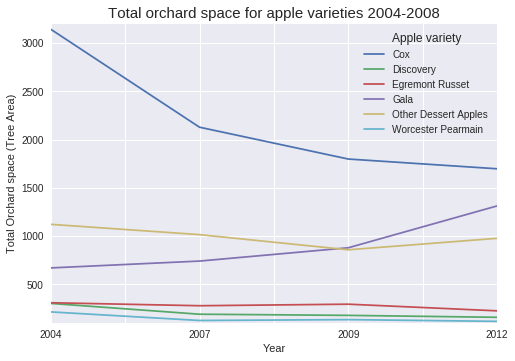

In [28]:
orchard_space_plot = merged_df.pivot('Year','Apple variety','Orchard space')
orchard_space_plot.plot.line(ylim=[100,3200])

plt.title('Total orchard space for apple varieties 2004-2008',fontsize=15)
plt.xlabel('Year')
plt.ylabel('Total Orchard space (Tree Area)')

Lets take a look at just Worcestor Pearmain


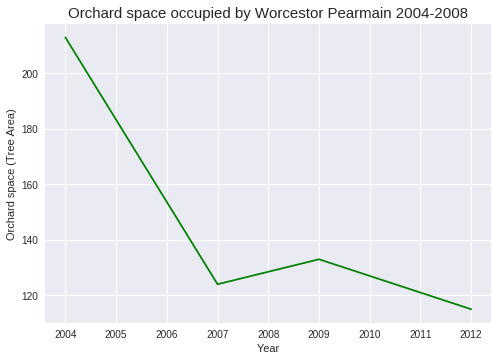

In [29]:
# highlight what looks to be the outlier
plt.plot(orchard_space_plot['Worcester Pearmain'], 'green')

plt.title('Orchard space occupied by Worcestor Pearmain 2004-2008',fontsize=15)
plt.xlabel('Year')
plt.ylabel('Orchard space (Tree Area)')

Let's look at to see if we can see a correlation using a scatter plot.

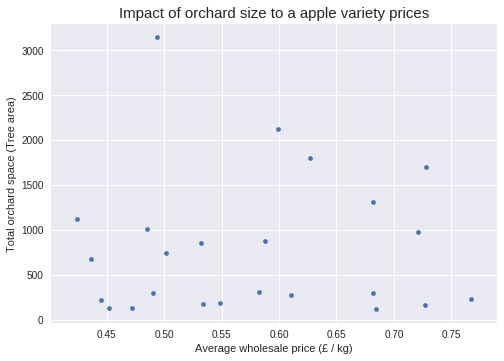

In [30]:
# create the scatter plot
merged_df.plot.scatter(x='Average wholesale price', y='Orchard space')
# add the title and axis labels
plt.title('Impact of orchard size to a apple variety prices', fontsize=15)
plt.xlabel('Average wholesale price (£ / kg)')
plt.ylabel('Total orchard space (Tree area)')

_Observation_ it looks like there could be a slight inverse correlation between these two variables.  Let's colour the scatter plot to try and glean more information out of it.


In [31]:
# double check how many years there are in the dataset
years = list(set(list(merged_df['Year'])))
years

['2012', '2004', '2007', '2009']

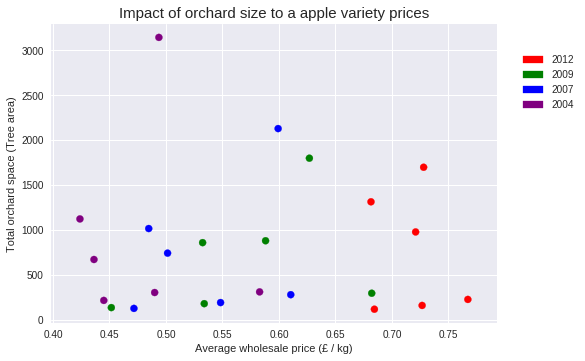

In [32]:
# make a copy of the merged_df to add a colour column to
scatter_df = merged_df.copy()
scatter_df['Colour'] = 'black'

# give each of the years found above a different colour
scatter_df.loc[(scatter_df['Year'] == '2004'),['Colour']] = 'purple'
scatter_df.loc[(scatter_df['Year'] == '2007'),['Colour']] = 'blue'
scatter_df.loc[(scatter_df['Year'] == '2009'),['Colour']] = 'green'
scatter_df.loc[(scatter_df['Year'] == '2012'),['Colour']] = 'red'

# create the colured scatter plot
scatter_df.plot.scatter(x='Average wholesale price', y='Orchard space',
                       s=50,
                       c=scatter_df['Colour'])
# add the title and axis labels
plt.title('Impact of orchard size to a apple variety prices', fontsize=15)
plt.xlabel('Average wholesale price (£ / kg)')
plt.ylabel('Total orchard space (Tree area)')

# adding a legend to the scatter plot
import matplotlib.patches as mpatches
# make the legend handles
legend_handles = ([mpatches.Patch(color='red', label='2012')]+
                 [mpatches.Patch(color='green', label='2009')]+
                 [mpatches.Patch(color='blue', label='2007')]+
                 [mpatches.Patch(color='purple', label='2004')])

plt.legend(handles=legend_handles, loc=(1.05,0.7))

#### 7. Interpret your plot

The final coloured Scatter plot does appear to suggest some kind of inverse correlation between Orchard space and wholesale prices of dessert apples. Aside from the obvious outlier higher average prices do seem to be somewhat associated with lower allocated spaces.  That said, the colouring suggests all apple prices shot up between 2009 and 2012.  So this could be reflective of something bigger happening in the produce marketplace, or even just inflation.

There are a number of other issues to bear in mind when trying to draw conclusions from these datasets, and this investigation.

Foremost of which is the amount of missing data within the datasets themselves.  Although I believe I handled these missing data rationally the end results of the calculations could be very different from the real world. As noted, the volume of apples sold of a given quality could greatly impact the 'average' wholesale price.  My method gives a fair approximation based on the information we had, but is far from accurate.  Unfortunately, the orchard data is also missing a quite a few years of information so we end up with a merged dataset that has far fewer data points than we would ideally want to gain insight into the impact of one variable on another.

